In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

ModuleNotFoundError: No module named 'pandas'

In [3]:
df = pd.read_csv("C:\Users\91986\Downloads\LP-IV-datasets\ecg_autoencoder_dataset.csv", header = None)
df

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1505138695.py, line 1)

In [4]:
X = df.drop([140], axis = 1)
y = df[140]

NameError: name 'df' is not defined

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

In [6]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [6]:
encoder = Sequential([Dense(64, activation = 'relu', input_shape = (X_train.shape[1],))])
decoder = Sequential([Dense(X_train.shape[1], activation = 'sigmoid')])

In [7]:
autoencoder = Sequential([encoder, decoder])

In [8]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [9]:
r = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 64, validation_data= (X_test, X_test))

Epoch 1/100
55/55 [==============================] - 0s 3ms/step - loss: 0.9916 - accuracy: 0.0395 - val_loss: 0.9918 - val_accuracy: 0.0707
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9835 - accuracy: 0.1026 - val_loss: 0.9889 - val_accuracy: 0.1340
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9816 - accuracy: 0.1495 - val_loss: 0.9878 - val_accuracy: 0.1720
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9807 - accuracy: 0.1687 - val_loss: 0.9873 - val_accuracy: 0.1853
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9803 - accuracy: 0.1870 - val_loss: 0.9869 - val_accuracy: 0.2033
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9799 - accuracy: 0.1981 - val_loss: 0.9866 - val_accuracy: 0.1987
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9797 - accuracy: 0.2021 - val_loss: 0.9865 - val_accuracy: 0.2080
Epoch 8/100
5

55/55 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.3365 - val_loss: 0.9853 - val_accuracy: 0.2987
Epoch 59/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.3362 - val_loss: 0.9853 - val_accuracy: 0.2987
Epoch 60/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.3376 - val_loss: 0.9853 - val_accuracy: 0.3120
Epoch 61/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.3422 - val_loss: 0.9853 - val_accuracy: 0.3000
Epoch 62/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.3373 - val_loss: 0.9853 - val_accuracy: 0.2987
Epoch 63/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.3453 - val_loss: 0.9852 - val_accuracy: 0.3113
Epoch 64/100
55/55 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.3413 - val_loss: 0.9852 - val_accuracy: 0.3007
Epoch 65/100
55/55 

In [10]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

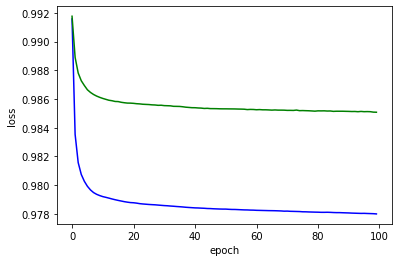

In [13]:
plt.plot(r.history['loss'], label = 'loss', color = 'blue')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend
plt.xlabel('epoch')
plt.ylabel('loss')

<function matplotlib.pyplot.legend(*args, **kwargs)>

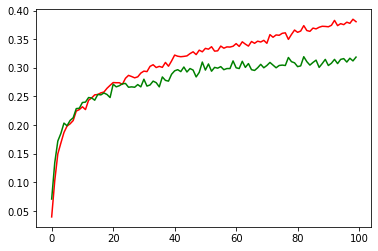

In [14]:
plt.plot(r.history['accuracy'], label = 'acc', color = 'red')
plt.plot(r.history['val_accuracy'], label = 'val_acc', color = 'green')
plt.legend

In [15]:
loss = autoencoder.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

47/47 [==============================] - 0s 931us/step - loss: 0.9851 - accuracy: 0.3187
Test Loss: [0.9850784540176392, 0.3186666667461395]


In [19]:
decoded_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 95)

outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

Confusion Matrix:
 [[581  41]
 [844  34]]
Classification report:
               precision    recall  f1-score   support

           0       0.41      0.93      0.57       622
           1       0.45      0.04      0.07       878

    accuracy                           0.41      1500
   macro avg       0.43      0.49      0.32      1500
weighted avg       0.43      0.41      0.28      1500



In [20]:
num_outliers = np.sum(outliers)
num_anomalies = np.sum(y_test[outliers] == 1)

In [23]:
print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 34
